In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

C:\Users\radha\downloads\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\radha\downloads\anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\radha\downloads\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [43]:
img_size=256
Batch_size=32
channels=3
epochs=50

In [7]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\radha\Desktop\AI PROJECTS\potato\PlantVillage",
    shuffle=True,
    image_size=(img_size,img_size),
    batch_size=Batch_size
)

Found 2152 files belonging to 3 classes.


In [8]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
len(dataset)

68

In [10]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)

(32, 256, 256, 3)


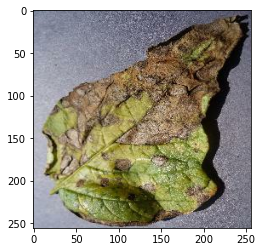

In [11]:
 for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('int'))

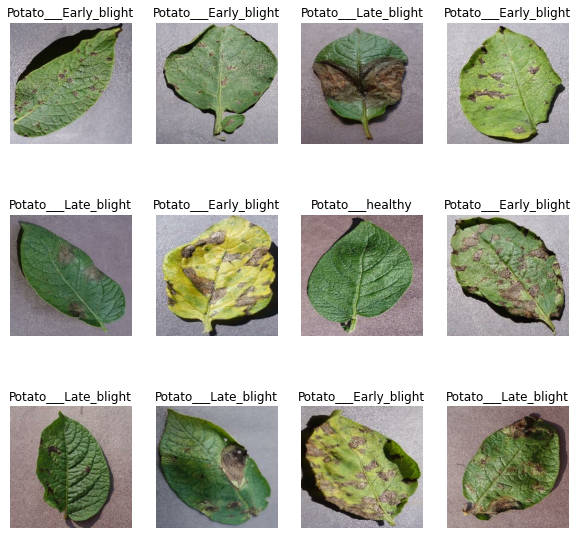

In [16]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('int'))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [17]:
len(dataset)

68

In [18]:
#dataset.take(10) # it will take first 10 datapoints
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [23]:
train_ds=dataset.take(54)
len(train_ds)

54

In [19]:
#dataset.skip(54) #it will take 54 onwards
test_ds=dataset.skip(54)
len(test_ds)

14

In [20]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [21]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [22]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [26]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
    
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [27]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [28]:
len(train_ds)

54

In [29]:
len(val_ds)

6

In [30]:
len(test_ds)

8

In [33]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [34]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(img_size,img_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [38]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [59]:
input_shape=(Batch_size,img_size,img_size,channels)
n_classes=3

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation="relu", input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax"),
])

model.build(input_shape=input_shape)

In [60]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_3 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (32, 60, 60, 64)        

In [61]:
 model.compile(
 optimizer="adam",
 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
 metrics=["accuracy"]
 )

In [63]:
history=model.fit(
train_ds,
epochs=epochs,
batch_size=Batch_size,
verbose=1,
validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 94s 2s/step - loss: 0.9035 - accuracy: 0.5006 - val_loss: 0.8367 - val_accuracy: 0.6406
Epoch 2/50
54/54 [==============================] - 94s 2s/step - loss: 0.6502 - accuracy: 0.7164 - val_loss: 0.8181 - val_accuracy: 0.6458
Epoch 3/50
54/54 [==============================] - 93s 2s/step - loss: 0.4526 - accuracy: 0.7986 - val_loss: 0.3084 - val_accuracy: 0.9115
Epoch 4/50
54/54 [==============================] - 88s 2s/step - loss: 0.3267 - accuracy: 0.8640 - val_loss: 0.1771 - val_accuracy: 0.9219
Epoch 5/50
54/54 [==============================] - 87s 2s/step - loss: 0.2525 - accuracy: 0.8953 - val_loss: 0.2229 - val_accuracy: 0.9062
Epoch 6/50
54/54 [==============================] - 88s 2s/step - loss: 0.2316 - accuracy: 0.9068 - val_loss: 0.1672 - val_accuracy: 0.9271
Epoch 7/50
54/54 [==============================] - 90s 2s/step - loss: 0.2133 - accuracy: 0.9132 - val_loss: 0.1674 - val_accuracy: 0.9375
Epoch 8/50
54/54 [==

In [76]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 3s 382ms/step - loss: 0.0594 - accuracy: 0.9727


In [77]:
scores

[0.059435419738292694, 0.97265625]

In [78]:
history

In [79]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 54}

In [80]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [82]:
acc=history.history["accuracy"]
acc

[0.9641203880310059,
 0.9803240895271301,
 0.9924768805503845,
 0.9872685074806213,
 0.9797453880310059]

In [83]:
val_acc=history.history["val_accuracy"]
val_acc

[0.984375, 0.9375, 0.9739583134651184, 0.9114583134651184, 0.984375]

In [84]:
loss=history.history["loss"]
loss

[0.09965210407972336,
 0.0584522970020771,
 0.023419979959726334,
 0.034848377108573914,
 0.0682496652007103]

In [85]:
val_loss=history.history["val_loss"]
val_loss

[0.05948810651898384,
 0.13737282156944275,
 0.07448877394199371,
 0.31728729605674744,
 0.059255871921777725]

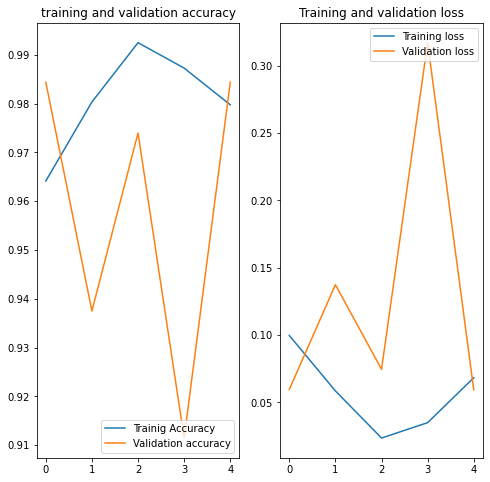

In [88]:
epochs=5
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs), acc, label="Trainig Accuracy")
plt.plot(range(epochs), val_acc, label="Validation accuracy")
plt.legend(loc="lower right")
plt.title("training and validation accuracy")

plt.subplot(1,2,2)
plt.plot(range(epochs), loss, label="Training loss")
plt.plot(range(epochs), val_loss, label="Validation loss")
plt.legend(loc="upper right")
plt.title("Training and validation loss")
plt.show()

In [103]:
test_ds.take(1)

<TakeDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

first image to predict
actual label:  Potato___Late_blight
predicted label:  Potato___Late_blight


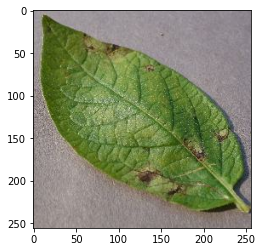

In [129]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_img= images_batch[0].numpy().astype("uint8")
    first_label= labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_img)
    print("actual label: ", class_names[first_label])
    
    batch_prediction=model.predict(images_batch)
    print("predicted label: ", class_names[np.argmax(batch_prediction[0])])
    

In [154]:
def predict(model, img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    
    predictions=model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

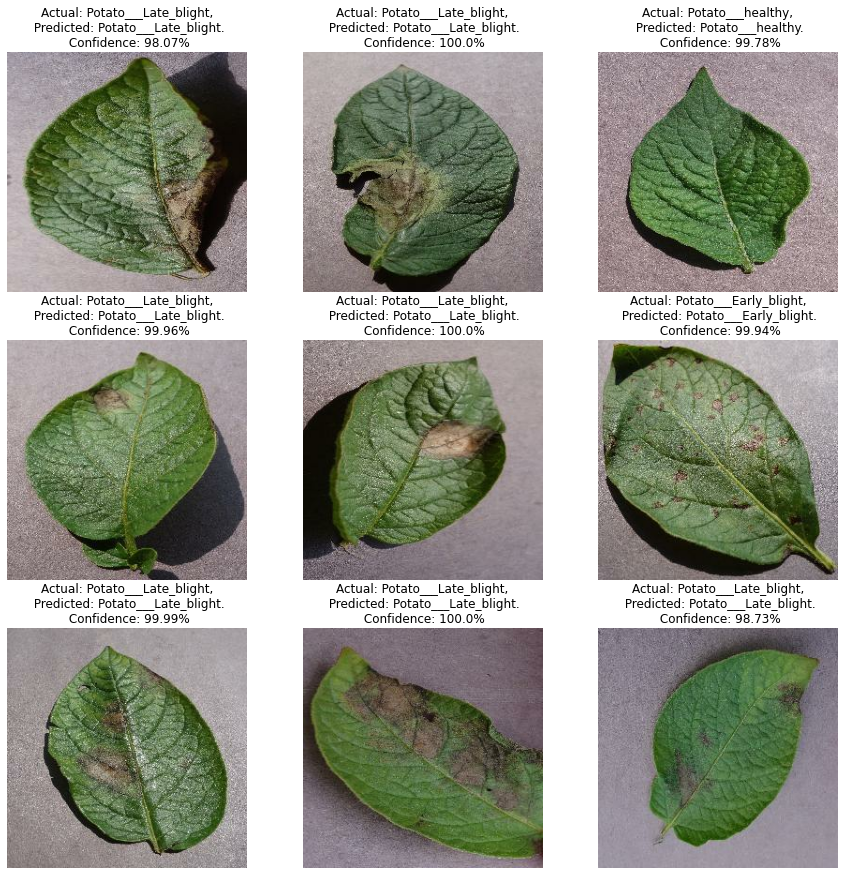

In [155]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)   
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [180]:
import datetime
p=(datetime.datetime.now())

model_version=p.strftime("%B_%d_%Y_%H_%M_%S")
model.save(f"C:\\Users\\radha\\Desktop\\AI PROJECTS\\Saved_Models\\{model_version}")

INFO:tensorflow:Assets written to: C:\Users\radha\Desktop\AI PROJECTS\Models\June_15_2022_17_08_07\assets


In [ ]:
"""import os
model_version=max([int(i) for i in os.listdir("C:\\Users\\radha\\Desktop\\AI PROJECTS\\Saved_Models")+[0]])+1
model.save(f"C:\\Users\\radha\\Desktop\\AI PROJECTS\\Saved_Models\\{model_version}")
"""

In [ ]:
ERROR: Could not install packages due to an OSError: [WinError 206] The filename or extension is too long: 
            'C:\\Users\\radha\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0
            \\LocalCache\\local-packages\\Python39\\site-packages\\tensorflow_model_optimization\\python
            \\core\\api\\quantization\\keras\\experimental\\default_n_bit\\default_n_bit_transforms'